In [71]:
## imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [72]:
# mount to drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
### DATASET
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv')
dataset.head()

<ipython-input-73-2bf14369b5e2>:2: DtypeWarning: Columns (12,45,46,47,48,49,50,51,52,83) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv')


business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universal Citywalk - Orlando, 6000 Universal Blvd        1   
4    Kissimmee                            4787 W Irlo Bronson Hwy        0   

    latitude  longitude                                 name  postal_code  \
0  28.914482 -81.295979                          Great Clips      32763.0   
1  28.440381 -81.469822                     Café Tu Tu Tango      32819.0   
2  28.427839 -81.308183  Orlando International Airport - MCO      32827.0   
3  28.473028 -81.465348         The Cowfish Sushi Burger Bar      32819.0   
4  28.330255 -81.469464               Saratoga Resort Villas      34746.0   

   review_count  ...  hours_Saturday hours_Sunday hours_Thursday  \
0             8  ...             NaN          NaN            NaN   
1          3236  ...        10:0-0:0    10:0-22:0      12:0-23:0   
2          2630  ...         0:0-0:0      0:0-0:0        0:0-0:0   
3          2407  ...        11:0-0:0    11:0-22:0      16:0-22:0   
4            55  ...         0:0-0:0      0:0-0:0        0:0-0:0   

  hours_Tuesday hours_Wednesday state AcceptCreditCards  \
0           NaN             NaN    FL                 1   
1     12:0-23:0       12:0-23:0    FL                 1   
2       0:0-0:0         0:0-0:0    FL                 1   
3     16:0-22:0       16:0-22:0    FL                 1   
4       0:0-0:0         0:0-0:0    FL                 1   

  attributes_RestaurantsDelivery_None  \
0                                True   
1                               False   
2                                True   
3                                True   
4                                True   

  attributes_RestaurantsDelivery_True_True NoiseLevel  
0                                    False        2.0  
1                                     True        NaN  
2                                    False        2.0  
3                                    False        NaN  
4                                    False        2.0  

[5 rows x 106 columns]

In [84]:
#1

X = dataset[['review_count', 'stars']]
y = dataset['is_open']

# Drop rows with missing values
X_clean = X.dropna()
y_clean = y[X.notna().all(axis=1)]

In [115]:
# train and test set
#X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.25, random_state=0)


In [116]:
##Pre-processing the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
# fit model
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [118]:
# predicitng the results

y_pred = classifier.predict(X_test)

In [119]:
#evaluate model
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 253,  586],
       [ 678, 1722]])

In [120]:
#eval part 2
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score_package = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_package)

Accuracy: 0.6097560975609756
Precision: 0.7461005199306759
Recall: 0.7175
F1 Score: 0.7315208156329651


<ipython-input-121-5c475b8b9a64>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


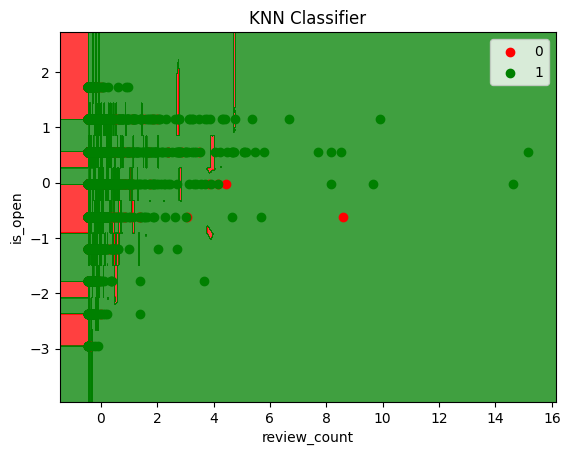

In [121]:
## Model visulaization with 4
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classifier')
plt.xlabel('review_count')
plt.ylabel('is_open')
plt.legend()
plt.show()

In [91]:
# model with 8
# fit model
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 142,  697],
       [ 298, 2102]])

In [94]:
#eval part 2
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score_package = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_package)

Accuracy: 0.6928064217351034
Precision: 0.750982493747767
Recall: 0.8758333333333334
F1 Score: 0.8086170417387959


<ipython-input-95-ca98dd55f7a8>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


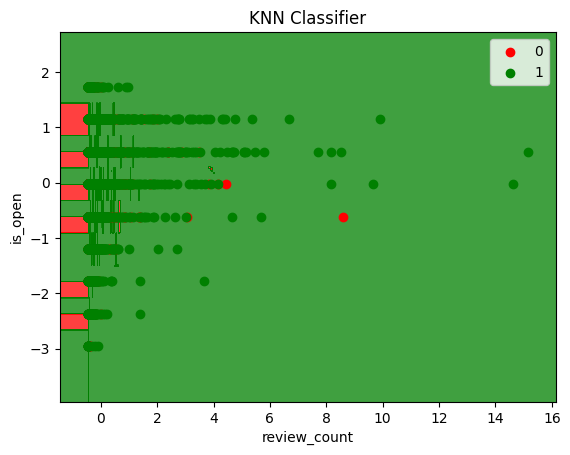

In [95]:
## Model visulaization with 8
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classifier')
plt.xlabel('review_count')
plt.ylabel('is_open')
plt.legend()
plt.show()

In [96]:
#model with 10

# fit model
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [97]:

y_pred = classifier.predict(X_test)

In [98]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 106,  733],
       [ 207, 2193]])

In [99]:
#eval part 2
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score_package = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score_package)

Accuracy: 0.7097869712874344
Precision: 0.7494873547505126
Recall: 0.91375
F1 Score: 0.8235073225685318


<ipython-input-100-ab3601e02463>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


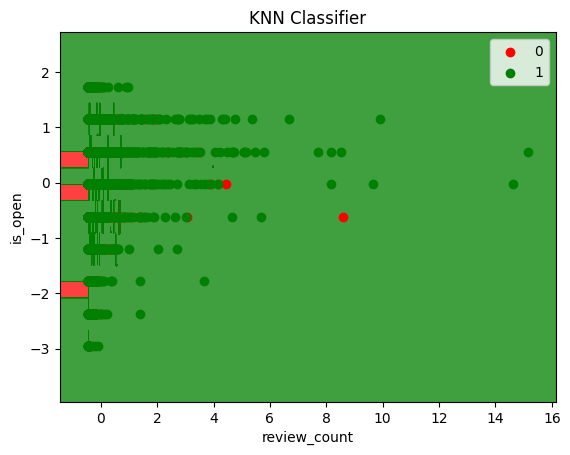

In [100]:
## Model visulaization with 10
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classifier')
plt.xlabel('review_count')
plt.ylabel('is_open')
plt.legend()
plt.show()



In [ ]:
### discussion


**DISCUSSION**

in the diffrent k sizes the red shrinks and the green grows necause more neighbors are added to the is open variable. withk=4, the decision boundary is more irregular and sensitive to local variations.
With higher k=8, k=10, the decision boundary is smoother, reducing overfitting.